In [46]:
# Sam Brown
# sam_brown@mines.edu
# June 6
# Investigate Form factor

import sys
sys.path.append("/Users/sambrown04/Documents/SURF/whillans-surf/notebooks/SURF")

import numpy as np 
import scipy
import matplotlib.pyplot as plt
import pandas as pd

import my_lib.funcs

evts_path = "/Users/sambrown04/Documents/SURF/Events/2013_2013Events2stas"

In [4]:
events_list = my_lib.funcs.load_evt(evts_path)

-165535.17251369057 -597424.3876911158
-164.51293820555554 -84.29886014722221


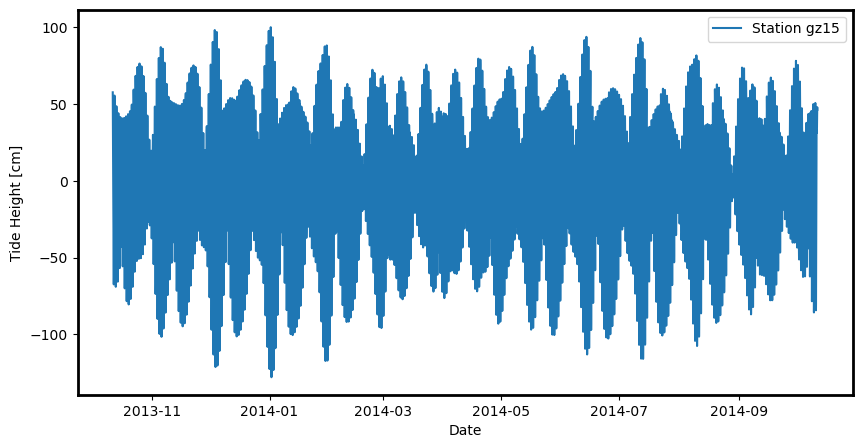

In [36]:
tide_time = my_lib.funcs.get_tide_data(events_list, 'gz15', days = 365, plot = True)

In [6]:
tide_time.head()

,time,tide_height
0,2013-10-11 18:51:30,57.633629
1,2013-10-11 19:01:30,56.377834
2,2013-10-11 19:11:30,55.042727
3,2013-10-11 19:21:30,53.634527
4,2013-10-11 19:31:30,52.159443


In [52]:
# FORM FACTOR
reference_time = tide_time['time'].iloc[0]
seconds = [(date - reference_time).total_seconds() for date in tide_time['time']]

# print(tide_time['tide_height'].shape, tide_time['time'].shape)

tide = tide_time['tide_height']
dates_timeseries = tide_time['time']

spacing = 4  # Minutes
mean_days =30
slide_days = 5
mean_units = int(mean_days * 24 * 60 / spacing)
slide_units = int(slide_days * 24 * 60 / spacing)

HR_TO_SEC = 3600
T_O1 = 25.81933871 * HR_TO_SEC
T_K1 = 23.93447213 * HR_TO_SEC
T_M2 = 12.4206012 * HR_TO_SEC
T_S2 = 12 * HR_TO_SEC

def sines(x, A1, phi1, A2, phi2):
    return A1 * np.sin(2 * np.pi * x / ((T_O1 + T_K1) / 2) + phi1) + A2 * np.sin(
        2 * np.pi * x / ((T_M2 + T_S2) / 2) + phi2
    )

form_factors = []
dates_form_factor = []
semidiurnal = []
diurnal = []
# Extract 3 days of tidal data with a 0.5 day slide
start = 0
end = mean_units
while end < len(seconds):
    seconds_tide = np.array(seconds[start:end], dtype=float)
    tide_window = np.array(tide[start:end], dtype=float)
    date_midpoint = dates_timeseries[(start + end) // 2]
    start += slide_units
    end += slide_units

    # Fit a sum of sines to the tide
    initial_guess = [50, 0, 50, 0]
    popt, pcov = scipy.optimize.curve_fit(sines, seconds_tide, tide_window, p0=initial_guess)

    # Extract fitted parameters
    Diurnal_fit, phi1_fit, SemiDiurnal_fit, phi2_fit = popt

    # Generate the fitted curve
    y_fit = sines(seconds_tide, Diurnal_fit, phi1_fit, SemiDiurnal_fit, phi2_fit)
    form_factor = np.abs(Diurnal_fit / SemiDiurnal_fit)
    semidiurnal.append((SemiDiurnal_fit))
    diurnal.append((Diurnal_fit))

    form_factors.append(form_factor)
    dates_form_factor.append(date_midpoint)

    


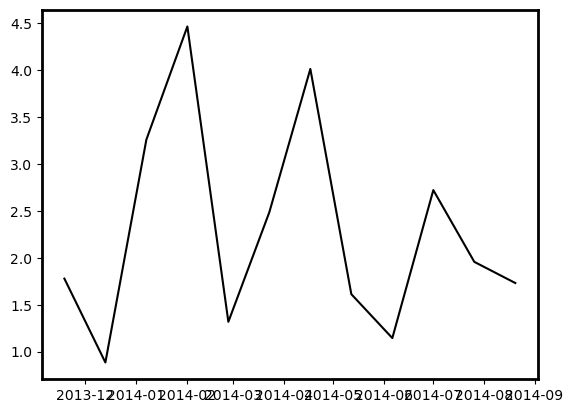

In [54]:
fig, ax = plt.subplots()
ax.plot(dates_form_factor, form_factors, color="black")

In [56]:
df = pd.DataFrame(columns = ['dates_form_factor', 'form_factors'])
df['dates_form_factor'] = dates_form_factor
df['form_factors'] = form_factors

In [62]:
df.head(20)

,dates_form_factor,form_factors
0,2013-11-18 06:51:30,1.778398
1,2013-12-13 06:51:30,0.883759
2,2014-01-07 06:51:30,3.261291
3,2014-02-01 06:51:30,4.468032
4,2014-02-26 06:51:30,1.317429
5,2014-03-23 06:51:30,2.487204
6,2014-04-17 06:51:30,4.015090
7,2014-05-12 06:51:30,1.612259
8,2014-06-06 06:51:30,1.144086
9,2014-07-01 06:51:30,2.722589
